In [71]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from knn_classifier import KNNClassifier
import time

# Datasets to evaluate
datasets = {
    "Iris": load_iris(),
    "Wine": load_wine(),
    "Breast Cancer": load_breast_cancer(),
    "Digits": load_digits()
}

# Values of K to test
K_values = [1, 3, 5, 7, 9]

results = []

for name, data in datasets.items():
    print(f"\nDATASET: {name}")

    X = data.data
    y = data.target

    # Train - test split (70 / 30)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, shuffle=True
    )

    for K in K_values:
        print(f"\nTesting K = {K}")

        # Custom KNN implementation
        start_time = time.perf_counter()
        knn = KNNClassifier(n_neighbors=K)
        knn.fit(X_train, y_train)
        train_time_knn = time.perf_counter() - start_time

        start_time = time.perf_counter()
        preds = knn.predict(X_test)
        predict_time_knn = time.perf_counter() - start_time

        start_time = time.perf_counter()
        acc = knn.score(X_test, y_test)
        score_time_knn = time.perf_counter() - start_time

        # KNN from Sklearn
        start_time = time.perf_counter()
        sk_knn = KNeighborsClassifier(n_neighbors=K, metric="euclidean")
        sk_knn.fit(X_train, y_train)
        train_time_sklearn = time.perf_counter() - start_time

        start_time = time.perf_counter()
        sk_preds = sk_knn.predict(X_test)
        predict_time_sklearn = time.perf_counter() - start_time

        start_time = time.perf_counter()
        sk_acc = sk_knn.score(X_test, y_test)
        score_time_sklearn = time.perf_counter() - start_time

        identical = np.array_equal(preds, sk_preds)
        diff_count = np.sum(preds != sk_preds)

        label_wdth = 30
        print(f"{'Custom KNN accuracy':<{label_wdth}} : {acc:.4f}")
        print(f"{'Sklearn KNN accuracy':<{label_wdth}} : {sk_acc:.4f}")
        print(f"{'Are predictions identical?':<{label_wdth}} : {identical}")
        print(f"{'Number of Differences':<{label_wdth}} : {diff_count}")

        print(f"\n{'Custom KNN train time (s)':<{label_wdth}} : {train_time_knn:.6f}")
        print(f"{'Custom KNN predict time (s)':<{label_wdth}} : {predict_time_knn:.6f}")
        print(f"{'Custom KNN score time (s)':<{label_wdth}} : {score_time_knn:.6f}")

        print(f"\n{'Sklearn KNN train time (s)':<{label_wdth}} : {train_time_sklearn:.6f}")
        print(f"{'Sklearn KNN predict time (s)':<{label_wdth}} : {predict_time_sklearn:.6f}")
        print(f"{'Sklearn KNN score time (s)':<{label_wdth}} : {score_time_sklearn:.6f}")

        results.append([
            name,
            K,
            acc,
            sk_acc,
            identical,
            diff_count,
            train_time_knn,
            predict_time_knn,
            score_time_knn,
            train_time_sklearn,
            predict_time_sklearn,
            score_time_sklearn,
        ])



DATASET: Iris

Testing K = 1
Custom KNN accuracy            : 1.0000
Sklearn KNN accuracy           : 1.0000
Are predictions identical?     : True
Number of Differences          : 0

Custom KNN train time (s)      : 0.000009
Custom KNN predict time (s)    : 0.021700
Custom KNN score time (s)      : 0.021553

Sklearn KNN train time (s)     : 0.000511
Sklearn KNN predict time (s)   : 0.002094
Sklearn KNN score time (s)     : 0.002170

Testing K = 3
Custom KNN accuracy            : 1.0000
Sklearn KNN accuracy           : 1.0000
Are predictions identical?     : True
Number of Differences          : 0

Custom KNN train time (s)      : 0.000007
Custom KNN predict time (s)    : 0.021839
Custom KNN score time (s)      : 0.021733

Sklearn KNN train time (s)     : 0.000464
Sklearn KNN predict time (s)   : 0.002060
Sklearn KNN score time (s)     : 0.002195

Testing K = 5
Custom KNN accuracy            : 1.0000
Sklearn KNN accuracy           : 1.0000
Are predictions identical?     : True
Number o

In [72]:
# Summary table
df_results = pd.DataFrame(
    results,
    columns=[
        "Dataset",
        "K",
        "Custom KNN Accuracy",
        "Sklearn KNN Accuracy",
        "Are predictions identical?",
        "Num. of Differences",
        "Custom KNN Train Time (s)",
        "Custom KNN Predict Time (s)",
        "Custom KNN Score Time (s)",
        "Sklearn KNN Train Time (s)",
        "Sklearn KNN Predict Time (s)",
        "Sklearn KNN Score Time (s)"
    ]
)

df_results

,Dataset,K,Custom KNN Accuracy,Sklearn KNN Accuracy,Are predictions identical?,Num. of Differences,Custom KNN Train Time (s),Custom KNN Predict Time (s),Custom KNN Score Time (s),Sklearn KNN Train Time (s),Sklearn KNN Predict Time (s),Sklearn KNN Score Time (s)
0,Iris,1,1.000000,1.000000,True,0,0.000009,0.021700,0.021553,0.000511,0.002094,0.002170
1,Iris,3,1.000000,1.000000,True,0,0.000007,0.021839,0.021733,0.000464,0.002060,0.002195
2,Iris,5,1.000000,1.000000,True,0,0.000007,0.021741,0.021497,0.000388,0.001967,0.002187
3,Iris,7,1.000000,1.000000,True,0,0.000006,0.021700,0.021679,0.000421,0.002047,0.002210
4,Iris,9,1.000000,1.000000,True,0,0.000006,0.021954,0.021943,0.000649,0.002376,0.002575
5,Wine,1,0.796296,0.796296,True,0,0.000007,0.031020,0.030675,0.000579,0.002365,0.002441
6,Wine,3,0.740741,0.740741,True,0,0.000007,0.030940,0.030661,0.000488,0.002254,0.002486
7,Wine,5,0.740741,0.740741,True,0,0.000006,0.030771,0.030521,0.000482,0.002295,0.002470
8,Wine,7,0.759259,0.759259,True,0,0.000006,0.030912,0.031084,0.000781,0.003286,0.002820
9,Wine,9,0.722222,0.722222,True,0,0.000010,0.030578,0.030275,0.000564,0.002373,0.002523


# Plots

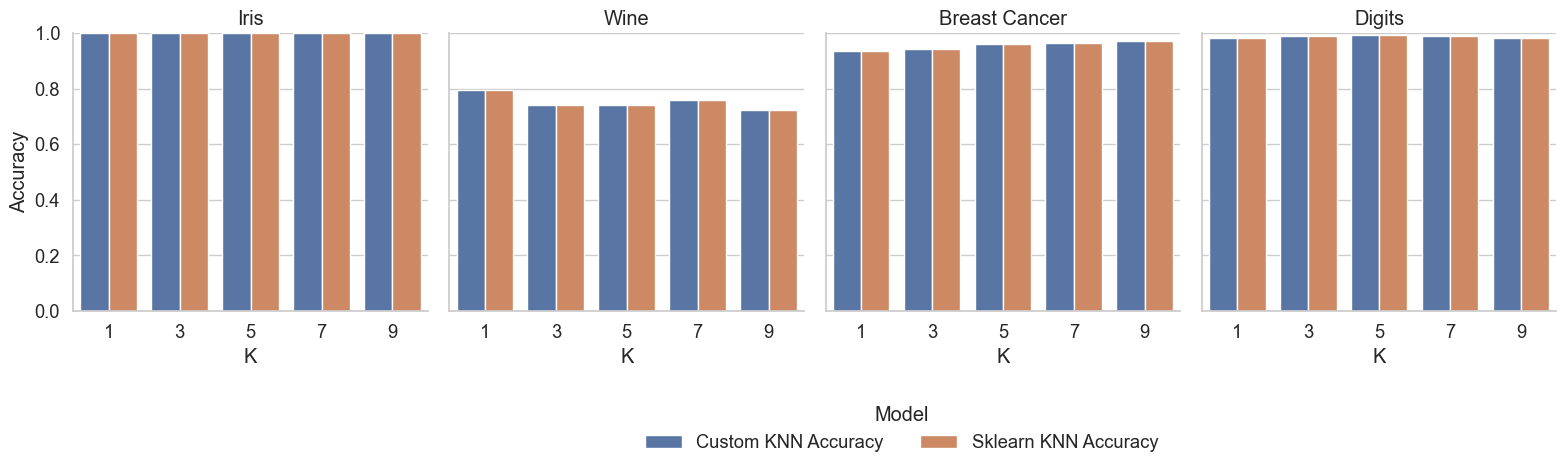

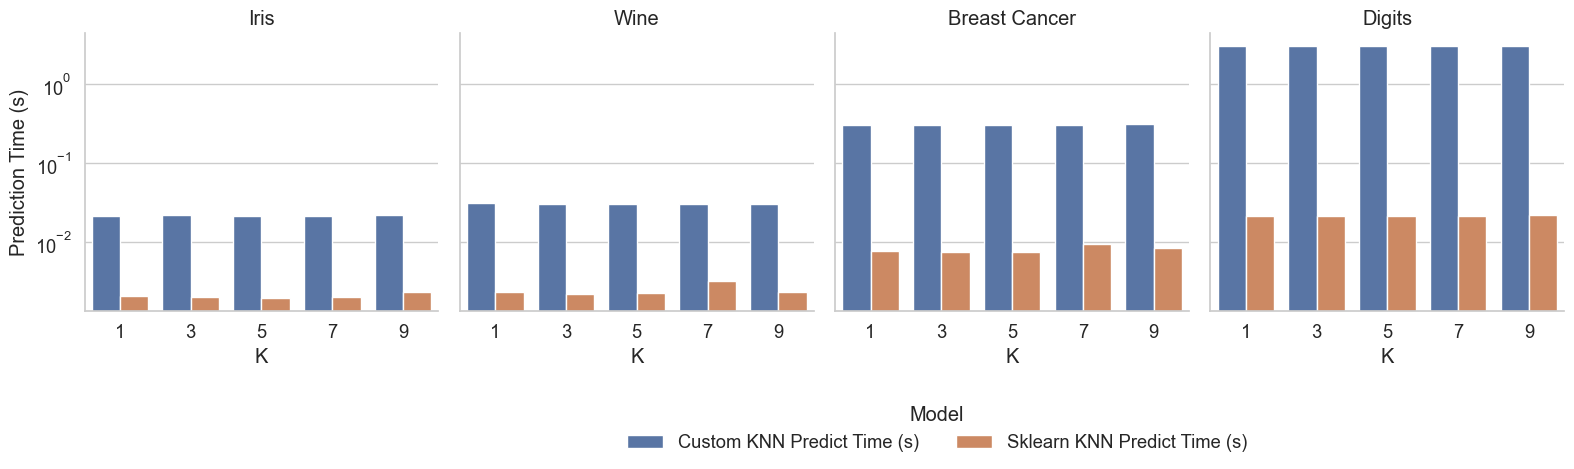

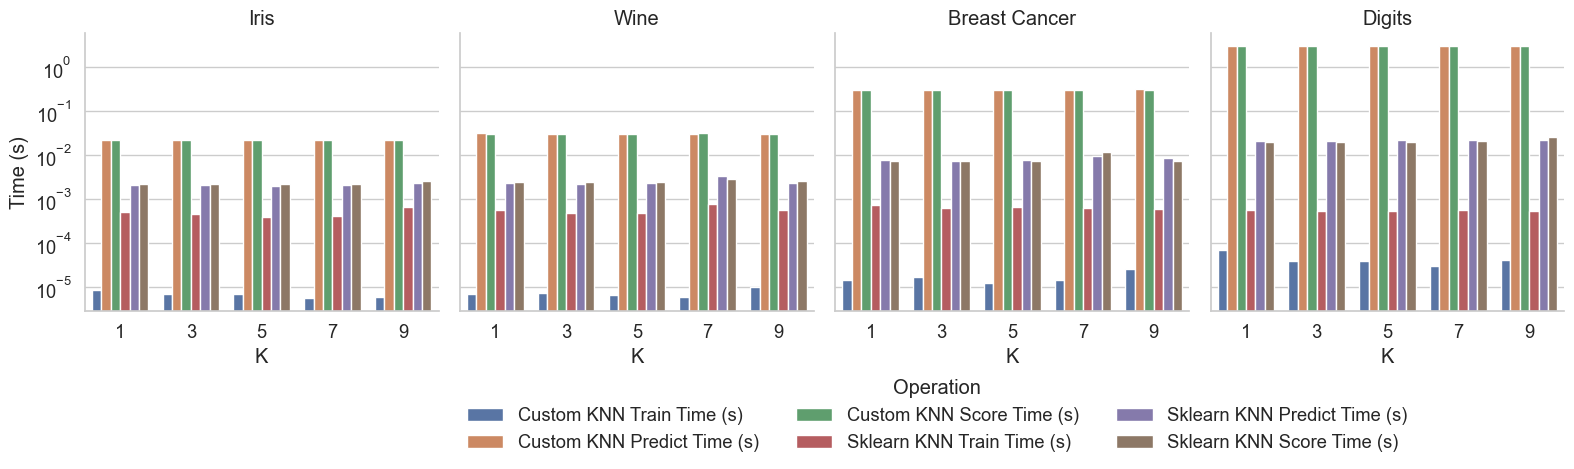

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.2)

# Acc Comparison
df_acc = df_results.melt(
    id_vars=["Dataset", "K"],
    value_vars=["Custom KNN Accuracy", "Sklearn KNN Accuracy"],
    var_name="Model",
    value_name="Accuracy"
)

g = sns.catplot(
    data=df_acc,
    x="K",
    y="Accuracy",
    hue="Model",
    col="Dataset",
    kind="bar",
    height=4,
    aspect=1
)
g.set_titles("{col_name}")
sns.move_legend(g, "lower center", ncol=3, bbox_to_anchor=(.5, -0.2),)
plt.ylim(0, 1)
plt.savefig("plot1.png", bbox_inches="tight")
plt.show()

# Prediction Time Comparison
df_time_pred = df_results.melt(
    id_vars=["Dataset", "K"],
    value_vars=["Custom KNN Predict Time (s)", "Sklearn KNN Predict Time (s)"],
    var_name="Model",
    value_name="Prediction Time (s)"
)

g = sns.catplot(
    data=df_time_pred,
    x="K",
    y="Prediction Time (s)",
    hue="Model",
    col="Dataset",
    kind="bar",
    height=4,
    aspect=1
)
g.set_titles("{col_name}")
sns.move_legend(g, "lower center", ncol=3, bbox_to_anchor=(.5, -0.2),)
g.set(yscale="log")
plt.savefig("plot2.png", bbox_inches="tight")
plt.show()


# All Times Summed Up Comparison
df_time_all = df_results.melt(
    id_vars=["Dataset", "K"],
    value_vars=[
        "Custom KNN Train Time (s)",
        "Custom KNN Predict Time (s)",
        "Custom KNN Score Time (s)",
        "Sklearn KNN Train Time (s)",
        "Sklearn KNN Predict Time (s)",
        "Sklearn KNN Score Time (s)"
    ],
    var_name="Operation",
    value_name="Time (s)"
)

g = sns.catplot(
    data=df_time_all,
    x="K",
    y="Time (s)",
    hue="Operation",
    col="Dataset",
    kind="bar",
    height=4,
    aspect=1
)
g.set_titles("{col_name}")
sns.move_legend(g, "lower center", ncol=3, bbox_to_anchor=(.5, -0.2),)
g.set(yscale="log")
plt.savefig("plot3.png", bbox_inches="tight")
plt.show()